<b> This code implements and explain an end to end pipeline of a simple CNN on MNIST dataset. The steps are following:</b> 

1. Loading and preprocessing
2. Defining the CNN model
3. Setting up the loss function and Optimizer 
4. Training the Model
5. Evaluating the test data
6. Making predictions on new data 


In [1]:
pip install torchvision

UnboundLocalError: cannot access local variable 'child' where it is not associated with a value

In [2]:
import torch
import torch.nn as nn 
import torch.optim as optim 
import torchvision 
from torchvision import transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
# Set device GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Setup preprocessing for dataset to convert numpy array of pixels to 
# tensor for easier processing which includes transforming to tensors 
# normalizing the pixel values in the range for easier convergence 

transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5, ), (0.5, ))])


### Let's visualize the images before and after the tranform 

In [ ]:
# Downloading MNIST dataset with and without transform
mnist_original = datasets.MNIST(root='./data', train=True, download=True)
mnist_tranformed = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

In [ ]:
# Take a sample image and its label 
index = 0 
original_image, label = mnist_original[index]
transformed_image, _ = mnist_tranformed[index]
# Convert the transformed image from tensor to numpy for visualization
# squeeze() removes the channel dimension  
transformed_image_np = transformed_image.squeeze().numpy()

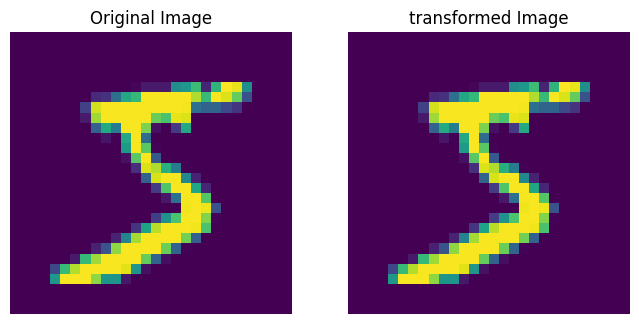

In [23]:
# Plot the images 
fig, axs = plt.subplots(1,2, figsize=(8,4))

#original image 
axs[0].imshow(original_image)
axs[0].set_title("Original Image")
axs[0].axis("off")

#transformed Image 
axs[1].imshow(transformed_image_np)
axs[1].set_title("transformed Image")
axs[1].axis("off")

plt.show()

In [28]:
# The normalization effect can witnessed by printing both 
# images and their pixel values 
original_image_np = np.array(original_image)
print("Pixel Values:\n", original_image_np)
transformed_image_np

Pixel Values:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [29]:
# Download train and test datasets 
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [ ]:
class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        # First convolution layer 
        # Why in_channels=1? Because MNIST images are grayscale (single channel)
        # Why padding=1? To maintain the spatial dimensions after convolution
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        self.relu = nn.Relu()
        #The pooling window is 2x2, meaning it will look at a 2x2 grid of values at a time.
        #The stride controls how much the window shifts each time. 
        # With a stride of 2, the window will move 2 pixels at a time, meaning it will not overlap with its previous position.
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) 

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1) 

        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Output layer with 10 classes 

    def forward(self, x): 
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = self.relu(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output layer
        return x
    
model = CNN_MNIST.to(device)

In [ ]:
# Loss and optimizer 
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop 
def train(model, train_loader, loss, optimizer, epoch=5):
    model.train()
    

In [ ]:

# 4. Training loop
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device
            
            optimizer.zero_grad()  # Zero gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Train the model
train(model, train_loader, criterion, optimizer, epochs=5)

# 5. Evaluate on test data
def evaluate(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to compute gradients
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Evaluate the trained model
evaluate(model, test_loader)

# 6. Making predictions on new data
def predict_sample(model, dataset, index=0):
    model.eval()
    image, label = dataset[index]  # Get sample image
    image = image.unsqueeze(0).to(device)  # Add batch dimension
    output = model(image)  # Forward pass
    _, predicted = torch.max(output, 1)  # Get predicted class
    
    # Plot the image
    plt.imshow(image.cpu().squeeze(), cmap='gray')
    plt.title(f'Predicted: {predicted.item()}, Actual: {label}')
    plt.show()

# Predict on a sample image
predict_sample(model, test_dataset, index=5)


In [36]:
### Explain about in_channels and out_channels which are features 
### Explain about how stride moves the filters
### Explain convolution 
### Explain about the channels, why channels remain the same spatial dimensions are reduced 

In [ ]:
# 2. Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)  
        # Why in_channels=1? Because MNIST images are grayscale (single channel)
        # Why padding=1? To maintain the spatial dimensions after convolution
        
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  
        # Similar reasoning for padding: To preserve spatial dimensions
        
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Output layer with 10 classes
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Apply first conv, relu, and pooling
        x = self.pool(self.relu(self.conv2(x)))  # Apply second conv, relu, and pooling
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = self.relu(self.fc1(x))  # Fully connected layer with ReLU
        x = self.fc2(x)  # Output layer
        return x
